In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# matplotlib ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÌïúÍµ≠Ïñ¥Î•º ÏßÄÏõê x 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
# plt.rcParams["font.family"] = "AppleGothic"  # Mac (Ïï†Ìîå Í≥†Îîï)

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams["axes.unicode_minus"] = False


   duty_category language_required  count  total_jobs  percentage
0             AI                Î¨¥Í¥Ä    434         449       96.66
1             AI                ÏòÅÏñ¥     14         449        3.12
2             AI               ÏùºÎ≥∏Ïñ¥      1         449        0.22
3            ERP                Î¨¥Í¥Ä     35          37       94.59
4            ERP                ÏòÅÏñ¥      2          37        5.41
5             PM                Î¨¥Í¥Ä    140         152       92.11
6             PM                ÏòÅÏñ¥     11         152        7.24
7             PM               ÏùºÎ≥∏Ïñ¥      1         152        0.66
8             QA                Î¨¥Í¥Ä    155         162       95.68
9             QA                ÏòÅÏñ¥      7         162        4.32
10            VR                Î¨¥Í¥Ä     15          15      100.00
11            Í≤åÏûÑ                Î¨¥Í¥Ä     21          23       91.30
12            Í≤åÏûÑ                ÏòÅÏñ¥      2          23        8.70
13        Îç

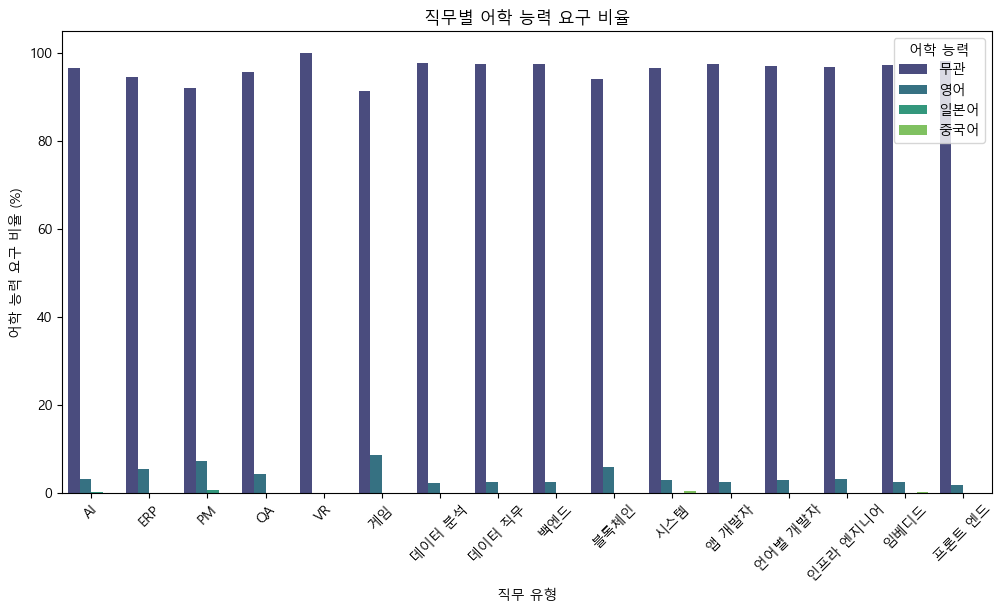

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ (ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ ÏÉùÏÑ±Îê®)
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞
cursor = conn.cursor()  # Ïª§ÏÑú ÏÉùÏÑ±

# SQL ÏøºÎ¶¨ ÏûëÏÑ±
sql_query = """
WITH total_count AS (
    SELECT 
        category AS duty_category, 
        COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
        WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
        WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
        ELSE 'Î¨¥Í¥Ä'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
    UNION ALL
    SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
    UNION ALL
    SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
    UNION ALL
    SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
    UNION ALL
    SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
    UNION ALL
    SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
    UNION ALL
    SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# PandasÎ°ú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
df = pd.read_sql_query(sql_query, conn)

# DB Ïó∞Í≤∞ Ìï¥Ï†ú
conn.close()

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="duty_category", y="percentage", hue="language_required", palette="viridis")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.xticks(rotation=45)
plt.xlabel("ÏßÅÎ¨¥ Ïú†Ìòï")
plt.ylabel("Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú® (%)")
plt.title("ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
plt.legend(title="Ïñ¥Ìïô Îä•Î†•")

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


In [11]:
print(df)

   duty_category language_required  count  total_jobs  percentage
0             AI                Î¨¥Í¥Ä    434         449       96.66
1             AI                ÏòÅÏñ¥     14         449        3.12
2             AI               ÏùºÎ≥∏Ïñ¥      1         449        0.22
3            ERP                Î¨¥Í¥Ä     35          37       94.59
4            ERP                ÏòÅÏñ¥      2          37        5.41
5             PM                Î¨¥Í¥Ä    140         152       92.11
6             PM                ÏòÅÏñ¥     11         152        7.24
7             PM               ÏùºÎ≥∏Ïñ¥      1         152        0.66
8             QA                Î¨¥Í¥Ä    155         162       95.68
9             QA                ÏòÅÏñ¥      7         162        4.32
10            VR                Î¨¥Í¥Ä     15          15      100.00
11            Í≤åÏûÑ                Î¨¥Í¥Ä     21          23       91.30
12            Í≤åÏûÑ                ÏòÅÏñ¥      2          23        8.70
13        Îç

   duty_category language_required  count  total_jobs  percentage
0             AI                Î¨¥Í¥Ä    434         449       96.66
1             AI                ÏòÅÏñ¥     14         449        3.12
2             AI               ÏùºÎ≥∏Ïñ¥      1         449        0.22
3            ERP                Î¨¥Í¥Ä     35          37       94.59
4            ERP                ÏòÅÏñ¥      2          37        5.41
5             PM                Î¨¥Í¥Ä    140         152       92.11
6             PM                ÏòÅÏñ¥     11         152        7.24
7             PM               ÏùºÎ≥∏Ïñ¥      1         152        0.66
8             QA                Î¨¥Í¥Ä    155         162       95.68
9             QA                ÏòÅÏñ¥      7         162        4.32
10            VR                Î¨¥Í¥Ä     15          15      100.00
11            Í≤åÏûÑ                Î¨¥Í¥Ä     21          23       91.30
12            Í≤åÏûÑ                ÏòÅÏñ¥      2          23        8.70
13        Îç

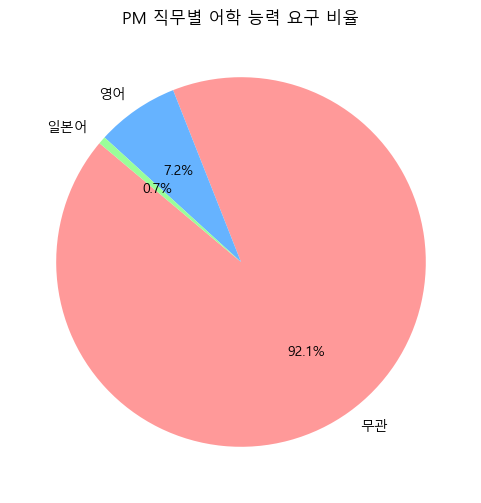

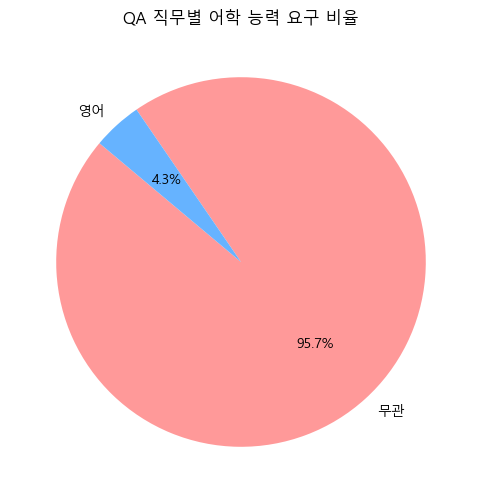

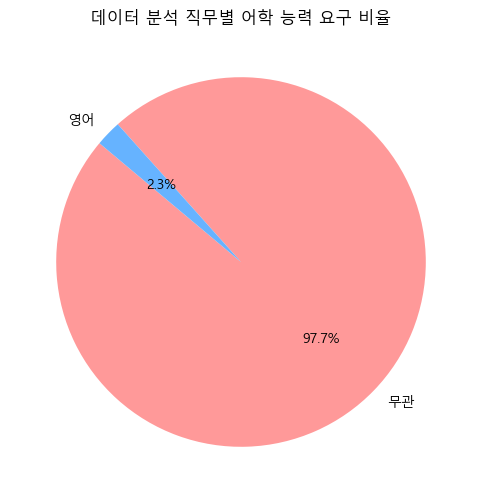

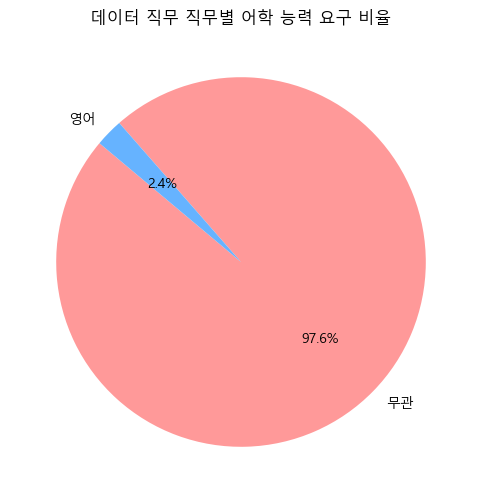

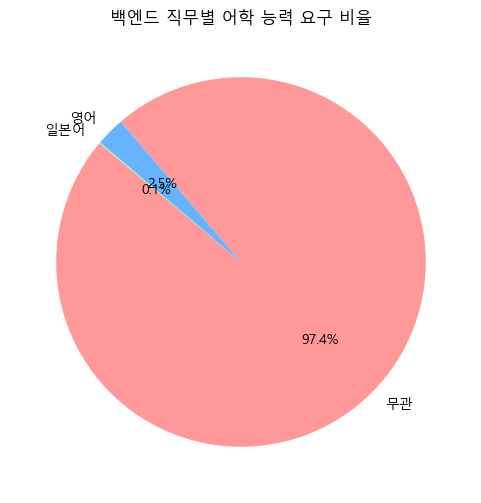

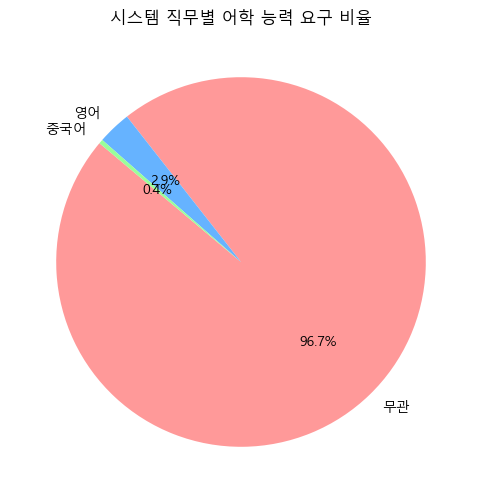

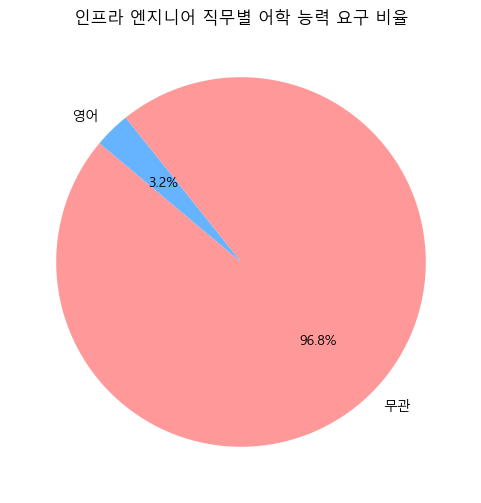

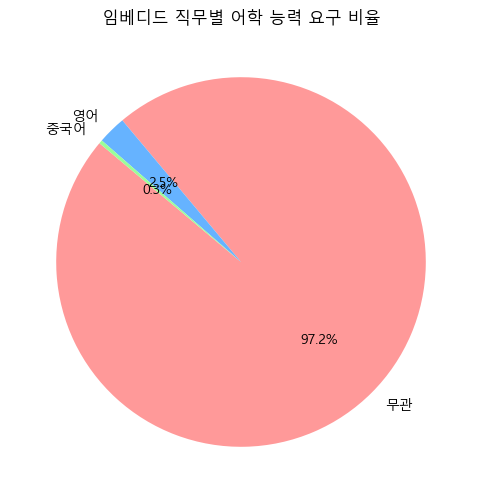

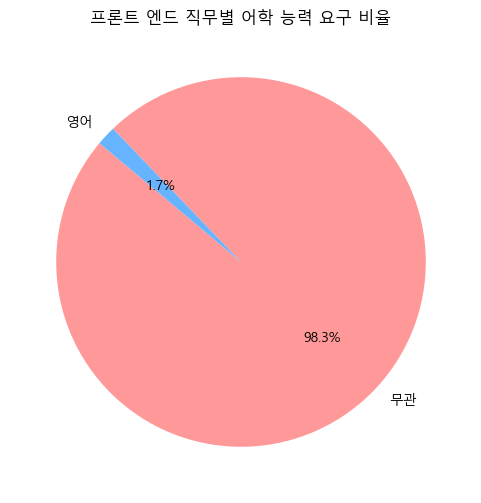

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
# plt.rcParams["font.family"] = "AppleGothic"  # Mac (Ïï†Ìîå Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞

try:
    # SQL ÏøºÎ¶¨ Ïã§Ìñâ
    sql_query = """
    WITH total_count AS (
        SELECT 
            category AS duty_category, 
            COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
            WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
            WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
            ELSE 'Î¨¥Í¥Ä'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLiteÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = pd.read_sql_query(sql_query, conn)

    # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ: Ïª¨ÎüºÎ™Ö Í≥µÎ∞± Ï†úÍ±∞
    df.columns = df.columns.str.strip()

    # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    print(df)

    # Ïõê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô ÏöîÍµ¨ ÎπÑÏú®)
    unique_duties = df["duty_category"].unique()

    # Í∞Å ÏßÅÎ¨¥Î≥Ñ Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    for duty in unique_duties:
        df_duty = df[df["duty_category"] == duty]

        # Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
        plt.figure(figsize=(6, 6))
        plt.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],  # ÏÉâÏÉÅ ÏßÄÏ†ï
        )
        
        # Ï†úÎ™© ÏÑ§Ï†ï
        plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
        
        # Ïõê Í∑∏ÎûòÌîÑ ÌëúÏãú
        plt.show()

except Exception as e:
    print(f"ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    # DB Ïó∞Í≤∞ Ìï¥Ï†ú
    conn.close()


   duty_category language_required  count  total_jobs  percentage
0             AI                Î¨¥Í¥Ä    434         449       96.66
1             AI                ÏòÅÏñ¥     14         449        3.12
2             AI               ÏùºÎ≥∏Ïñ¥      1         449        0.22
3            ERP                Î¨¥Í¥Ä     35          37       94.59
4            ERP                ÏòÅÏñ¥      2          37        5.41
5             PM                Î¨¥Í¥Ä    140         152       92.11
6             PM                ÏòÅÏñ¥     11         152        7.24
7             PM               ÏùºÎ≥∏Ïñ¥      1         152        0.66
8             QA                Î¨¥Í¥Ä    155         162       95.68
9             QA                ÏòÅÏñ¥      7         162        4.32
10            VR                Î¨¥Í¥Ä     15          15      100.00
11            Í≤åÏûÑ                Î¨¥Í¥Ä     21          23       91.30
12            Í≤åÏûÑ                ÏòÅÏñ¥      2          23        8.70
13        Îç

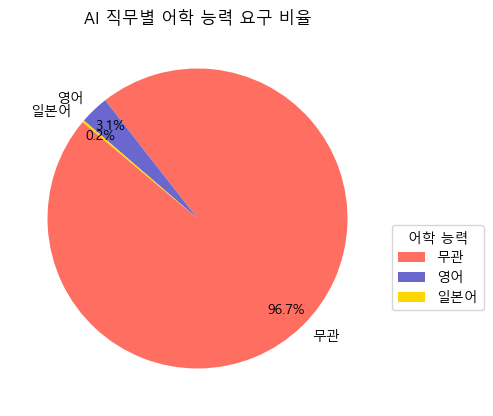

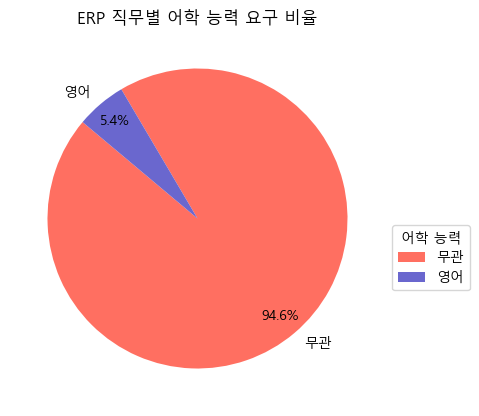

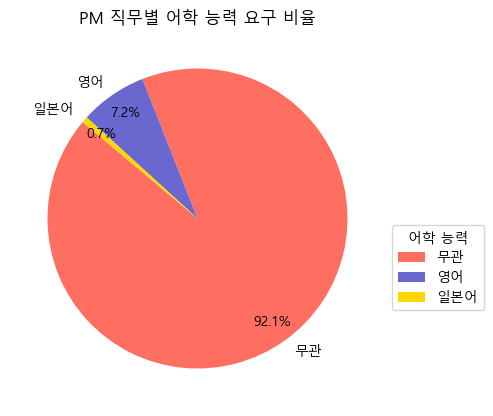

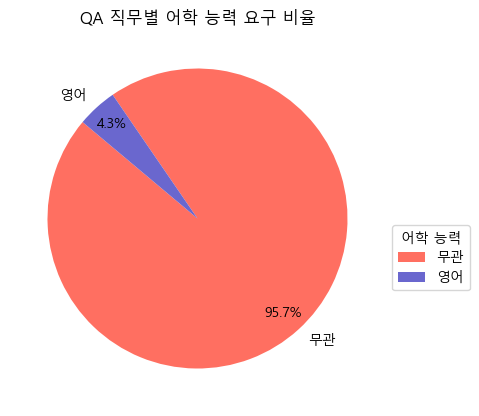

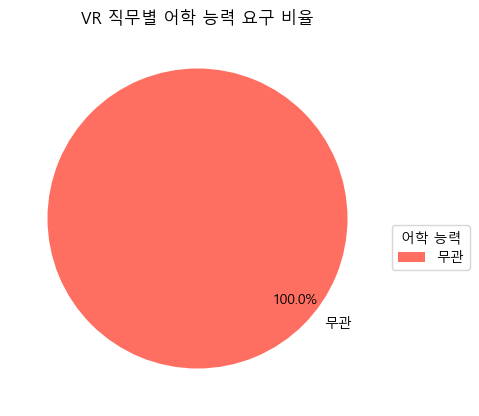

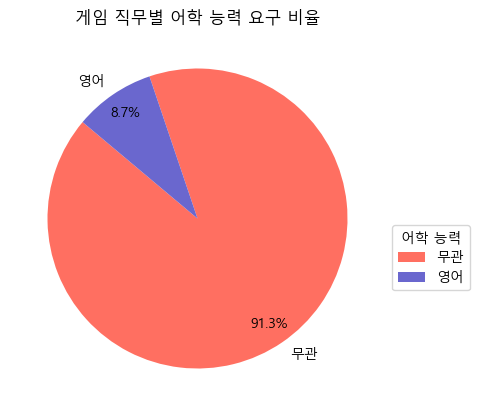

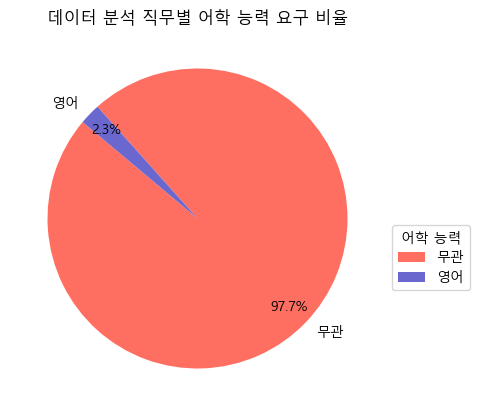

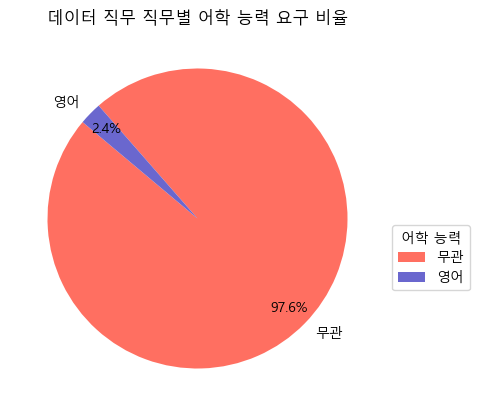

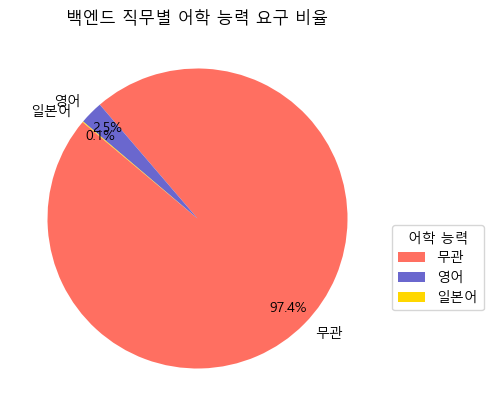

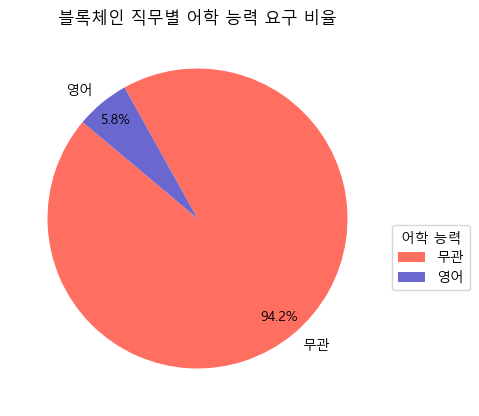

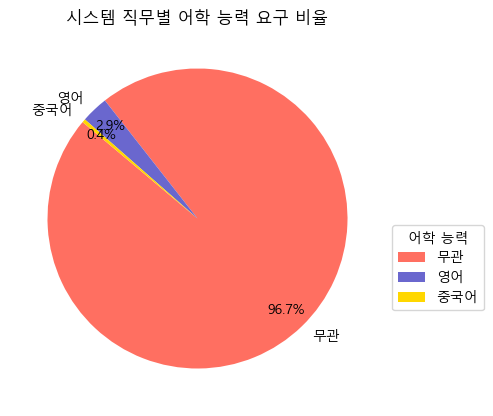

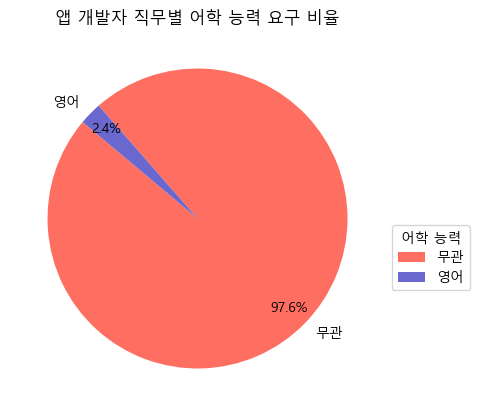

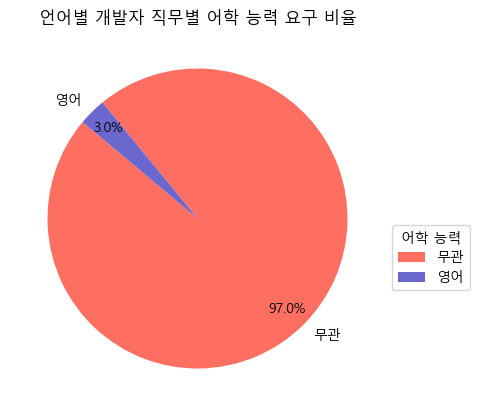

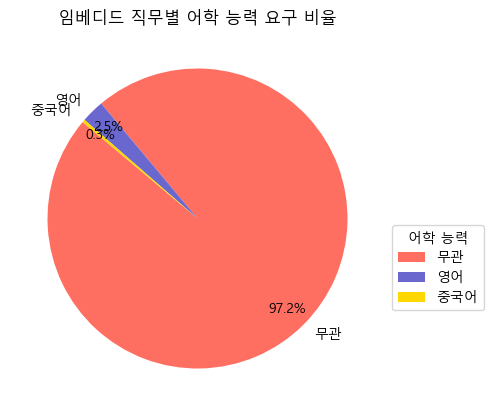

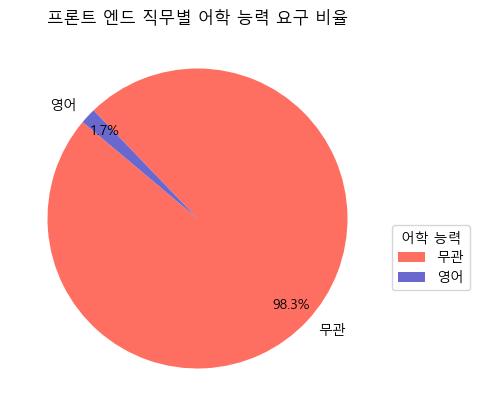

In [ ]:
# Î™ÖÌôïÌïú Í∞í Íµ¨Î∂ÑÏùÑ ÏúÑÌï¥ Î≤îÎ°Ä Ï∂îÍ∞Ä
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞

try:
    # SQL ÏøºÎ¶¨ Ïã§Ìñâ
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
            WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
            WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
            ELSE 'Î¨¥Í¥Ä'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLiteÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = pd.read_sql_query(sql_query, conn)

    # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ: Ïª¨ÎüºÎ™Ö Í≥µÎ∞± Ï†úÍ±∞
    df.columns = df.columns.str.strip()

    # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    print(df)

    # üìå Ïõê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô ÏöîÍµ¨ ÎπÑÏú®)
    unique_duties = df["duty_category"].unique()

    # Í∞Å ÏßÅÎ¨¥Î≥Ñ Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    for duty in unique_duties:
        df_duty = df[df["duty_category"] == duty]

        # Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,  # ÌçºÏÑºÌä∏ ÌëúÏãúÎ•º Ïõê Î∞ñÏúºÎ°ú Ïù¥Îèô
            colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]  ,  # ÏÉâÏÉÅ ÏßÄÏ†ï
        )

        # Î≤îÎ°Ä Ï∂îÍ∞Ä
        ax.legend(wedges, df_duty["language_required"], title="Ïñ¥Ìïô Îä•Î†•", loc="best", bbox_to_anchor=(1, 0.5))

        # Ï†úÎ™© ÏÑ§Ï†ï
        plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")

        # Ïõê Í∑∏ÎûòÌîÑ ÌëúÏãú
        plt.subplots_adjust(right=0.75)  # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
        plt.show()

except Exception as e:
    print(f"ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    # DB Ïó∞Í≤∞ Ìï¥Ï†ú
    conn.close() 


In [23]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
output_dir = "./charts"
os.makedirs(output_dir, exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞
cursor = conn.cursor()

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ï†ÄÏû• ÌÖåÏù¥Î∏î ÏÉùÏÑ± (ÏóÜÏúºÎ©¥ ÏÉùÏÑ±)
cursor.execute("""
CREATE TABLE IF NOT EXISTS image_paths (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    duty_category TEXT,
    image_path TEXT
)
""")
conn.commit()  # Î≥ÄÍ≤Ω ÏÇ¨Ìï≠ Ï†ÄÏû•

try:
    # SQL ÏøºÎ¶¨ Ïã§Ìñâ
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
            WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
            WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
            ELSE 'Î¨¥Í¥Ä'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLiteÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = pd.read_sql_query(sql_query, conn)

    # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ: Ïª¨ÎüºÎ™Ö Í≥µÎ∞± Ï†úÍ±∞
    df.columns = df.columns.str.strip()

    # ÏÉâÏÉÅ ÏÑ§Ï†ï
    colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

    # Í∞Å ÏßÅÎ¨¥Î≥Ñ Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=colors,
        )

        ax.legend(wedges, df_duty["language_required"], title="Ïñ¥Ìïô Îä•Î†•", loc="best", bbox_to_anchor=(1, 0.5))
        plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
        plt.subplots_adjust(right=0.75)

        # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú ÏßÄÏ†ï
        image_path = os.path.join(output_dir, f"{duty}_Ïñ¥ÌïôÎä•Î†•.png")
        plt.savefig(image_path, bbox_inches="tight")  # Í∑∏ÎûòÌîÑ Ï†ÄÏû•
        plt.close(fig)  # Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ Í∑∏ÎûòÌîÑ Îã´Í∏∞

        # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º DBÏóê Ï†ÄÏû•
        cursor.execute("INSERT INTO image_paths (duty_category, image_path) VALUES (?, ?)", (duty, image_path))
        conn.commit()

except Exception as e:
    print(f"ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    # DB Ïó∞Í≤∞ Ìï¥Ï†ú
    conn.close()


In [24]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞
cursor = conn.cursor()

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
output_dir = "./charts2"
os.makedirs(output_dir, exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±

# `duty_analysis` ÌÖåÏù¥Î∏î Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='duty_analysis';")
table_exists = cursor.fetchone()

if not table_exists:
    print("‚ùå `duty_analysis` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. ÌÖåÏù¥Î∏îÏùÑ ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§.")
    conn.close()
else:
    print("‚úÖ `duty_analysis` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.")

    try:
        # SQL ÏøºÎ¶¨ Ïã§Ìñâ
        sql_query = """
        WITH total_count AS (
            SELECT category AS duty_category, COUNT(*) AS total_jobs
            FROM (
                SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
                UNION ALL
                SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
                UNION ALL
                SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
                UNION ALL
                SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
                UNION ALL
                SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
                UNION ALL
                SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
                UNION ALL
                SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
                UNION ALL
                SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
                UNION ALL
                SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
                UNION ALL
                SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
                UNION ALL
                SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
                UNION ALL
                SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
                UNION ALL
                SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
                UNION ALL
                SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
                UNION ALL
                SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
                UNION ALL
                SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
            ) AS filtered_data
            GROUP BY category
        )

        SELECT 
            f.category AS duty_category, 
            CASE 
                WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
                WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
                WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
                ELSE 'Î¨¥Í¥Ä'
            END AS language_required,
            COUNT(*) AS count,
            t.total_jobs,
            ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS f
        JOIN total_count t ON f.category = t.duty_category
        GROUP BY f.category, language_required, t.total_jobs
        ORDER BY f.category, percentage DESC;
        """

        # Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
        df = pd.read_sql_query(sql_query, conn)

        # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ: Ïª¨ÎüºÎ™Ö Í≥µÎ∞± Ï†úÍ±∞
        df.columns = df.columns.str.strip()

        # ÏÉâÏÉÅ ÏÑ§Ï†ï
        colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

        # Í∞Å ÏßÅÎ¨¥Î≥Ñ Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
        for duty in df["duty_category"].unique():
            df_duty = df[df["duty_category"] == duty]

            fig, ax = plt.subplots(figsize=(6, 6))

            ax.pie(
                df_duty["percentage"],
                labels=df_duty["language_required"],
                autopct="%1.1f%%",
                startangle=140,
                pctdistance=0.85,
                colors=colors,
            )

            plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
            plt.subplots_adjust(right=0.75)

            # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú ÏßÄÏ†ï
            image_path = os.path.join(output_dir, f"{duty}_Ïñ¥ÌïôÎä•Î†•.png")
            plt.savefig(image_path, bbox_inches="tight")
            plt.close(fig)

            # `duty_analysis` ÌÖåÏù¥Î∏î ÏóÖÎç∞Ïù¥Ìä∏
            cursor.execute("""
                UPDATE duty_analysis SET language = ? WHERE duty = ?
            """, (image_path, duty))
            conn.commit()

        print("‚úÖ Î™®Îì† ÏßÅÎ¨¥Î≥Ñ ÏãúÍ∞ÅÌôî Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÍ≥† DBÏóê Î∞òÏòÅÎêòÏóàÏäµÎãàÎã§.")

    except Exception as e:
        print(f"‚ùå ÏóêÎü¨ Î∞úÏÉù: {e}")

    finally:
        conn.close()


‚úÖ `duty_analysis` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
‚úÖ Î™®Îì† ÏßÅÎ¨¥Î≥Ñ ÏãúÍ∞ÅÌôî Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÍ≥† DBÏóê Î∞òÏòÅÎêòÏóàÏäµÎãàÎã§.


# ÏµúÏ¢Ö ÏΩîÎìú 
img_paths ÌÖåÏù¥Î∏îÏóê ÏûàÎäî image_pathÏπºÎüº Í∞íÏùÑ duty_analysis ÌÖåÏù¥Î∏îÏùò language ÏπºÎüºÏóê Ï†ÄÏû•Ìï¥ÏïºÌïòÍ≥†
img_paths ÌÖåÏù¥Î∏îÏóê ÏûàÎäî duty_categoryÎ•º duty_analysis ÌÖåÏù¥Î∏îÏùò dutyÏóê Ï†ÄÏû•Ìï¥ÏïºÌï¥ 

In [31]:
import sqlite3

# ÏóÖÎ°úÎìúÎêú SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Í≤ΩÎ°ú
db_path = "asia.db"  # ÏóÖÎ°úÎìúÎêú DB Í≤ΩÎ°ú

# SQLite DB Ïó∞Í≤∞
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

try:
    # `duty_analysis` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='duty_analysis';")
    duty_analysis_exists = cursor.fetchone()

    # `image_paths` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='image_paths';")
    image_paths_exists = cursor.fetchone()

    if not duty_analysis_exists:
        print("‚ùå `duty_analysis` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
    elif not image_paths_exists:
        print("‚ùå `image_paths` ÌÖåÏù¥Î∏îÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
    else:
        print("‚úÖ Îëê Í∞úÏùò ÌÖåÏù¥Î∏îÏù¥ Î™®Îëê Ï°¥Ïû¨Ìï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏ ÏßÑÌñâ Ï§ë...")

        # `image_paths` ÌÖåÏù¥Î∏îÏóêÏÑú `duty_category`ÏôÄ `image_path` Í∞ÄÏ†∏Ïò§Í∏∞
        query = "SELECT duty_category, image_path FROM image_paths;"
        df = pd.read_sql_query(query, conn)

        # `duty_analysis` ÌÖåÏù¥Î∏îÏóê ÏóÖÎç∞Ïù¥Ìä∏
        for index, row in df.iterrows():
            cursor.execute("""
                UPDATE duty_analysis 
                SET language = ? 
                WHERE duty = ?;
            """, (row["image_path"], row["duty_category"]))
        
        conn.commit()
        print("‚úÖ `duty_analysis` ÌÖåÏù¥Î∏îÏùò `language` Ïª¨ÎüºÏù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏóàÏäµÎãàÎã§.")

except Exception as e:
    print(f"‚ùå ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    # DB Ïó∞Í≤∞ Ï¢ÖÎ£å
    conn.close()


‚úÖ Îëê Í∞úÏùò ÌÖåÏù¥Î∏îÏù¥ Î™®Îëê Ï°¥Ïû¨Ìï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏ ÏßÑÌñâ Ï§ë...
‚úÖ `duty_analysis` ÌÖåÏù¥Î∏îÏùò `language` Ïª¨ÎüºÏù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏóàÏäµÎãàÎã§.


# ÏµúÏ¢Ö 2

In [33]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞
cursor = conn.cursor()

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
output_dir = "charts_language"
os.makedirs(output_dir, exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±

# `duty_analysis` ÌÖåÏù¥Î∏î Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ Î∞è ÏÉùÏÑ±
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    language TEXT
);
""")
conn.commit()
print("‚úÖ `duty_analysis` ÌÖåÏù¥Î∏î ÌôïÏù∏ Î∞è ÏÉùÏÑ± ÏôÑÎ£å")

try:
    # SQL ÏøºÎ¶¨ Ïã§Ìñâ: ÏßÅÎ¨¥Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
            WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
            WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
            ELSE 'Î¨¥Í¥Ä'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = pd.read_sql_query(sql_query, conn)

    # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ: Ïª¨ÎüºÎ™Ö Í≥µÎ∞± Ï†úÍ±∞
    df.columns = df.columns.str.strip()

    # ÏÉâÏÉÅ ÏÑ§Ï†ï
    colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

    # Í∞Å ÏßÅÎ¨¥Î≥Ñ Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=colors,
        )

        plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
        plt.subplots_adjust(right=0.75)

        # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú ÏßÄÏ†ï
        image_path = os.path.join(output_dir, f"{duty}_Ïñ¥ÌïôÎä•Î†•.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # `duty_analysis` ÌÖåÏù¥Î∏îÏóê Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (ÏßÅÎ¨¥ÏôÄ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú)
        cursor.execute("""
            INSERT OR REPLACE INTO duty_analysis (duty, language) VALUES (?, ?)
        """, (duty, image_path))
        conn.commit()

    print("‚úÖ Î™®Îì† ÏßÅÎ¨¥Î≥Ñ ÏãúÍ∞ÅÌôî Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÍ≥† `duty_analysis` ÌÖåÏù¥Î∏îÏóê Î∞òÏòÅÎêòÏóàÏäµÎãàÎã§.")

except Exception as e:
    print(f"‚ùå ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    conn.close()


‚úÖ `duty_analysis` ÌÖåÏù¥Î∏î ÌôïÏù∏ Î∞è ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Î™®Îì† ÏßÅÎ¨¥Î≥Ñ ÏãúÍ∞ÅÌôî Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÍ≥† `duty_analysis` ÌÖåÏù¥Î∏îÏóê Î∞òÏòÅÎêòÏóàÏäµÎãàÎã§.


In [4]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows & Mac ÎåÄÏùë)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (ÎßëÏùÄ Í≥†Îîï)
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"  # SQLite DB ÌååÏùº Í≤ΩÎ°ú
conn = sqlite3.connect(db_path)  # DB Ïó∞Í≤∞
cursor = conn.cursor()

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ìè¥Îçî ÏÉùÏÑ±
output_dir = "Language_charts"
os.makedirs(output_dir, exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±

# `duty_analysis` ÌÖåÏù¥Î∏î Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ Î∞è ÏÉùÏÑ±
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    language TEXT
);
""")
conn.commit()
print("‚úÖ `duty_analysis` ÌÖåÏù¥Î∏î ÌôïÏù∏ Î∞è ÏÉùÏÑ± ÏôÑÎ£å")

try:
    # SQL ÏøºÎ¶¨ Ïã§Ìñâ: ÏßÅÎ¨¥Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
            UNION ALL
            SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
            UNION ALL
            SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
            UNION ALL
            SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
            UNION ALL
            SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
            UNION ALL
            SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
            UNION ALL
            SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
            WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
            WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
            ELSE 'Î¨¥Í¥Ä'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()  # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
    
    cursor.execute(sql_query)
    rows = cursor.fetchall()
    print(rows)

    # Ïõê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû• (Í∞Å ÏßÅÎ¨¥Î≥Ñ)
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"],
        )

        # Î≤îÎ°Ä Ï∂îÍ∞Ä
        ax.legend(wedges, df_duty["language_required"], title="Ïñ¥Ìïô Îä•Î†•", loc="best", bbox_to_anchor=(1, 0.5))

        # Ï†úÎ™© ÏÑ§Ï†ï
        plt.title(f"{duty} ÏßÅÎ¨¥Î≥Ñ Ïñ¥Ìïô Îä•Î†• ÏöîÍµ¨ ÎπÑÏú®")
        plt.subplots_adjust(right=0.75)

        # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
        image_path = os.path.join(output_dir, f"{duty}_Ïñ¥ÌïôÎä•Î†•.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # `duty_analysis` ÌÖåÏù¥Î∏î ÏóÖÎç∞Ïù¥Ìä∏
        cursor.execute("""
            INSERT OR REPLACE INTO duty_analysis (duty, language) VALUES (?, ?)
        """, (duty, image_path))
        conn.commit()

    print("‚úÖ Î™®Îì† ÏßÅÎ¨¥Î≥Ñ ÏãúÍ∞ÅÌôî Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÍ≥† `duty_analysis` ÌÖåÏù¥Î∏îÏóê Î∞òÏòÅÎêòÏóàÏäµÎãàÎã§.")

except Exception as e:
    print(f"‚ùå ÏóêÎü¨ Î∞úÏÉù: {e}")

finally:
    conn.close()


‚úÖ `duty_analysis` ÌÖåÏù¥Î∏î ÌôïÏù∏ Î∞è ÏÉùÏÑ± ÏôÑÎ£å
[('AI', 'Î¨¥Í¥Ä', 434, 449, 96.66), ('AI', 'ÏòÅÏñ¥', 14, 449, 3.12), ('AI', 'ÏùºÎ≥∏Ïñ¥', 1, 449, 0.22), ('ERP', 'Î¨¥Í¥Ä', 35, 37, 94.59), ('ERP', 'ÏòÅÏñ¥', 2, 37, 5.41), ('PM', 'Î¨¥Í¥Ä', 140, 152, 92.11), ('PM', 'ÏòÅÏñ¥', 11, 152, 7.24), ('PM', 'ÏùºÎ≥∏Ïñ¥', 1, 152, 0.66), ('QA', 'Î¨¥Í¥Ä', 155, 162, 95.68), ('QA', 'ÏòÅÏñ¥', 7, 162, 4.32), ('VR', 'Î¨¥Í¥Ä', 15, 15, 100.0), ('Í≤åÏûÑ', 'Î¨¥Í¥Ä', 21, 23, 91.3), ('Í≤åÏûÑ', 'ÏòÅÏñ¥', 2, 23, 8.7), ('Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù', 'Î¨¥Í¥Ä', 129, 132, 97.73), ('Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù', 'ÏòÅÏñ¥', 3, 132, 2.27), ('Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥', 'Î¨¥Í¥Ä', 360, 369, 97.56), ('Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥', 'ÏòÅÏñ¥', 9, 369, 2.44), ('Î∞±ÏóîÎìú', 'Î¨¥Í¥Ä', 1276, 1310, 97.4), ('Î∞±ÏóîÎìú', 'ÏòÅÏñ¥', 33, 1310, 2.52), ('Î∞±ÏóîÎìú', 'ÏùºÎ≥∏Ïñ¥', 1, 1310, 0.08), ('Î∏îÎ°ùÏ≤¥Ïù∏', 'Î¨¥Í¥Ä', 65, 69, 94.2), ('Î∏îÎ°ùÏ≤¥Ïù∏', 'ÏòÅÏñ¥', 4, 69, 5.8), ('ÏãúÏä§ÌÖú', 'Î¨¥Í¥Ä', 264, 273, 96.7), ('ÏãúÏä§ÌÖú', 'ÏòÅÏñ¥', 8, 273, 2.93), ('ÏãúÏä§ÌÖú', 'Ï§ëÍµ≠Ïñ

In [ ]:
# gpt api ÌÖåÏä§Ìä∏ 

In [ ]:
import sqlite3
import openai

# ‚úÖ OpenAI API ÌÇ§ ÏÑ§Ï†ï (Î≥∏Ïù∏Ïùò ÌÇ§Î°ú Î≥ÄÍ≤Ω ÌïÑÏöî)
openai.api_key = ""


# ‚úÖ SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ‚úÖ SQL ÏøºÎ¶¨ Ïã§ÌñâÌïòÏó¨ Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
        WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
        WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
        ELSE 'Î¨¥Í¥Ä'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
    UNION ALL
    SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
    UNION ALL
    SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
    UNION ALL
    SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
    UNION ALL
    SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
    UNION ALL
    SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
    UNION ALL
    SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
cursor.execute(sql_query)
rows = cursor.fetchall()

# ‚úÖ GPT-3.5 API Ìò∏Ï∂úÌïòÏó¨ ÏöîÏïΩ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî.
    - ÏöîÍµ¨ÎêòÎäî Ïñ∏Ïñ¥: {language}
    - Ï¥ù Ï±ÑÏö© Í≥µÍ≥† Ïàò: {total_jobs}Í∞ú
    - ÌäπÏ†ï Ïñ∏Ïñ¥ ÏöîÍµ¨ Í≥µÍ≥† Ïàò: {count}Í∞ú
    - Ï†ÑÏ≤¥ Í≥µÍ≥† Ï§ë Ìï¥Îãπ Ïñ∏Ïñ¥ ÏöîÍµ¨ ÎπÑÏú®: {percentage}%
    
    ÏúÑ Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú Ìï¥Îãπ ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ 1~2Ï§ÑÎ°ú ÏöîÏïΩÌï¥Ï£ºÏÑ∏Ïöî.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}]
        )
        summary = response.choices[0].message.content.strip()

        # ‚úÖ `language_summary` ÏπºÎüº ÏóÖÎç∞Ïù¥Ìä∏
        cursor.execute(
            "UPDATE duty_analysis SET language_summary = ? WHERE duty = ?;",
            (summary, duty)
        )
        conn.commit()

        print(f"‚úÖ {duty} ÏöîÏïΩ ÏôÑÎ£å: {summary}")

    except Exception as e:
        print(f"‚ùå {duty} ÏöîÏïΩ Ïã§Ìå®: {e}")

# ‚úÖ DB Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()
print("üéØ Î™®Îì† ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ ÏöîÏïΩÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


In [3]:
import sqlite3
import openai

# ‚úÖ OpenAI API ÌÇ§ ÏÑ§Ï†ï (Î≥∏Ïù∏Ïùò ÌÇ§Î°ú Î≥ÄÍ≤Ω ÌïÑÏöî)
openai.api_key = ""

# ‚úÖ SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ‚úÖ SQL ÏøºÎ¶¨ Ïã§ÌñâÌïòÏó¨ Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
        WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
        WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
        ELSE 'Î¨¥Í¥Ä'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
    UNION ALL
    SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
    UNION ALL
    SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
    UNION ALL
    SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
    UNION ALL
    SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
    UNION ALL
    SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
    UNION ALL
    SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
cursor.execute(sql_query)
rows = cursor.fetchall()

# ‚úÖ GPT-3.5 API Ìò∏Ï∂úÌïòÏó¨ ÏöîÏïΩ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî.
    - ÏöîÍµ¨ÎêòÎäî Ïñ∏Ïñ¥: {language}
    - Ï¥ù Ï±ÑÏö© Í≥µÍ≥† Ïàò: {total_jobs}Í∞ú
    - ÌäπÏ†ï Ïñ∏Ïñ¥ ÏöîÍµ¨ Í≥µÍ≥† Ïàò: {count}Í∞ú
    - Ï†ÑÏ≤¥ Í≥µÍ≥† Ï§ë Ìï¥Îãπ Ïñ∏Ïñ¥ ÏöîÍµ¨ ÎπÑÏú®: {percentage}%
    
    ÏúÑ Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú Ìï¥Îãπ ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ 1~2Ï§ÑÎ°ú ÏöîÏïΩÌï¥Ï£ºÏÑ∏Ïöî.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}]
        )
        summary = response.choices[0].message.content.strip()

        # ‚úÖ Í∏∞Ï°¥ language ÏπºÎüºÏùò Í∞í Í∞ÄÏ†∏Ïò§Í∏∞ (Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ïú†ÏßÄ)
        cursor.execute(
            "SELECT language FROM duty_analysis WHERE duty = ?;",
            (duty,)
        )
        existing_language_data = cursor.fetchone()

        if existing_language_data:
            existing_text = existing_language_data[0]
            updated_text = f"{existing_text} {summary}"  # Í∏∞Ï°¥ Í∞íÍ≥º ÏöîÏïΩ Í≤∞Í≥ºÎ•º Ìï©Ïπ®
        else:
            updated_text = summary  # Í∏∞Ï°¥ Í∞íÏù¥ ÏóÜÏúºÎ©¥ ÏöîÏïΩÎßå Ï†ÄÏû•

        # ‚úÖ `language` ÏπºÎüº ÏóÖÎç∞Ïù¥Ìä∏
        cursor.execute(
            "UPDATE duty_analysis SET language = ? WHERE duty = ?;",
            (updated_text, duty)
        )
        conn.commit()

        print(f"‚úÖ {duty} ÏöîÏïΩ ÏôÑÎ£å: {summary}")

    except Exception as e:
        print(f"‚ùå {duty} ÏöîÏïΩ Ïã§Ìå®: {e}")

# ‚úÖ DB Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()
print("üéØ Î™®Îì† ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ ÏöîÏïΩÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å: AI ÏßÅÎ¨¥ÏóêÏÑú Ïñ∏Ïñ¥ ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏóÜÏúºÎ©∞, Ï†ÑÏ≤¥ Ï±ÑÏö© Í≥µÍ≥†Ïùò 96.66%ÏóêÏÑú ÌäπÏ†ï Ïñ∏Ïñ¥Ïùò ÏöîÍµ¨Í∞Ä ÎìúÎ¨ºÍ≤å ÏûàÏäµÎãàÎã§.
‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å: AI ÏßÅÎ¨¥ÏóêÏÑúÎäî ÏòÅÏñ¥ Îä•Î†•Ïù¥ ÏöîÍµ¨ÎêòÎ©∞, Ï†ÑÏ≤¥ Ï±ÑÏö© Í≥µÍ≥† Ï§ë 3.12%Í∞Ä ÏòÅÏñ¥ Îä•Î†•ÏùÑ ÏöîÍµ¨ÌïòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å: "AI" ÏßÅÎ¨¥ÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ÏóêÎäî ÏùºÎ≥∏Ïñ¥ Îä•Î†•Ïù¥ ÏöîÍµ¨ÎêòÏßÄ ÏïäÏúºÎ©∞, ÌäπÏ†ï Ïñ∏Ïñ¥ ÏöîÍµ¨Îäî Îß§Ïö∞ ÎìúÎ¨ºÎã§.
‚úÖ ERP ÏöîÏïΩ ÏôÑÎ£å: ERP ÏßÅÎ¨¥ÏóêÏÑúÎäî ÌäπÏ†ï Ïñ∏Ïñ¥Ïóê ÎåÄÌïú ÏöîÍµ¨Í∞Ä ÎÜíÏúºÎ©∞, Ï†ÑÏ≤¥ Í≥µÍ≥† Ï§ë Ìï¥Îãπ Ïñ∏Ïñ¥ ÏöîÍµ¨ ÎπÑÏú®ÏùÄ 94.59%Ïóê Ïù¥Î•∏Îã§.
‚úÖ ERP ÏöîÏïΩ ÏôÑÎ£å: ERP ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÄ ÏòÅÏñ¥Í∞Ä ÌïÑÏàòÏù¥Î©∞, Ï†ÑÏ≤¥ Í≥µÍ≥† Ï§ë Ìï¥Îãπ Ïñ∏Ïñ¥ ÏöîÍµ¨ ÎπÑÏú®ÏùÄ 5.41%Î°úÏÑú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ ÏàòÏ§ÄÏù¥Îã§.
‚úÖ PM ÏöîÏïΩ ÏôÑÎ£å: "PM" ÏßÅÎ¨¥ÏóêÏÑúÎäî ÌäπÏ†ï Ïñ∏Ïñ¥Ïóê ÎåÄÌïú ÏöîÍµ¨Í∞Ä Îß§Ïö∞ ÎÜíÏúºÎ©∞, ÎåÄÎ∂ÄÎ∂ÑÏùò Ï±ÑÏö© Í≥µÍ≥†ÏóêÏÑú Ìï¥Îãπ Ïñ∏Ïñ¥ Îä•Î†•Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§

In [ ]:
# gpt4 Î™®Îç∏Î°ú ÍµêÏ≤¥ 

In [5]:
import sqlite3
import openai

# ‚úÖ OpenAI API ÌÇ§ ÏÑ§Ï†ï
openai.api_key = ""

# ‚úÖ SQLite Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [6]:
# ‚úÖ SQL ÏøºÎ¶¨ Ïã§ÌñâÌïòÏó¨ Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞ (rows Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú ÏàòÌñâ)
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
        UNION ALL
        SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
        UNION ALL
        SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
        UNION ALL
        SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
        UNION ALL
        SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
        UNION ALL
        SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
        UNION ALL
        SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN 'ÏòÅÏñ¥'
        WHEN f.language = 2 THEN 'ÏùºÎ≥∏Ïñ¥'
        WHEN f.language = 3 THEN 'Ï§ëÍµ≠Ïñ¥'
        ELSE 'Î¨¥Í¥Ä'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ ÏßÅÎ¨¥%'
    UNION ALL
    SELECT 'Î∞±ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%Î∞±ÏóîÎìú%'
    UNION ALL
    SELECT 'Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥' AS category, language FROM processing WHERE duty LIKE '%Ïù∏ÌîÑÎùº ÏóîÏßÄÎãàÏñ¥%'
    UNION ALL
    SELECT 'Ïï± Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïï± Í∞úÎ∞úÏûê%'
    UNION ALL
    SELECT 'Í≤åÏûÑ' AS category, language FROM processing WHERE duty LIKE '%Í≤åÏûÑ%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT 'ÏûÑÎ≤†ÎîîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÏûÑÎ≤†ÎîîÎìú%'
    UNION ALL
    SELECT 'ÌîÑÎ°†Ìä∏ ÏóîÎìú' AS category, language FROM processing WHERE duty LIKE '%ÌîÑÎ°†Ìä∏ ÏóîÎìú%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT 'Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù' AS category, language FROM processing WHERE duty LIKE '%Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT 'ÏãúÏä§ÌÖú' AS category, language FROM processing WHERE duty LIKE '%ÏãúÏä§ÌÖú%'
    UNION ALL
    SELECT 'Î∏îÎ°ùÏ≤¥Ïù∏' AS category, language FROM processing WHERE duty LIKE '%Î∏îÎ°ùÏ≤¥Ïù∏%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT 'Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê' AS category, language FROM processing WHERE duty LIKE '%Ïñ∏Ïñ¥Î≥Ñ Í∞úÎ∞úÏûê%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
cursor.execute(sql_query)
rows = cursor.fetchall()

# ‚úÖ GPT-4 API Ìò∏Ï∂úÌïòÏó¨ ÏöîÏïΩ ÏÉùÏÑ± Î∞è Í∏∞Ï°¥ ÏöîÏïΩÏùÑ ÎçÆÏñ¥Ïì∞Í∏∞
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî.
    - ÏöîÍµ¨ÎêòÎäî Ïñ∏Ïñ¥: {language}
    - Ï¥ù Ï±ÑÏö© Í≥µÍ≥† Ïàò: {total_jobs}Í∞ú
    - ÌäπÏ†ï Ïñ∏Ïñ¥ ÏöîÍµ¨ Í≥µÍ≥† Ïàò: {count}Í∞ú
    - Ï†ÑÏ≤¥ Í≥µÍ≥† Ï§ë Ìï¥Îãπ Ïñ∏Ïñ¥ ÏöîÍµ¨ ÎπÑÏú®: {percentage}%
    
    ÏúÑ Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú Ìï¥Îãπ ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ÏùÑ 1~2Ï§ÑÎ°ú ÏöîÏïΩÌï¥Ï£ºÏÑ∏Ïöî.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}]
        )
        gpt4_summary = response.choices[0].message.content.strip()

        # ‚úÖ Í∏∞Ï°¥ language ÏπºÎüºÏùò Í∞í Í∞ÄÏ†∏Ïò§Í∏∞ (Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ïú†ÏßÄ)
        cursor.execute(
            "SELECT language FROM duty_analysis WHERE duty = ?;",
            (duty,)
        )
        existing_language_data = cursor.fetchone()

        if existing_language_data:
            parts = existing_language_data[0].split(")", 1)  # ")"ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÏôÄ Í∏∞Ï°¥ ÏöîÏïΩ Î∂ÑÎ¶¨
            image_path = parts[0] + ")" if len(parts) > 1 else existing_language_data[0]  # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ïú†ÏßÄ
        else:
            image_path = ""

        # ‚úÖ `language` Í∞í ÏóÖÎç∞Ïù¥Ìä∏ (Í∏∞Ï°¥ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú + ÏÉàÎ°úÏö¥ GPT-4 ÏöîÏïΩ)
        updated_text = f"{image_path} ({gpt4_summary})"

        cursor.execute(
            "UPDATE duty_analysis SET language = ? WHERE duty = ?;",
            (updated_text, duty)
        )
        conn.commit()

        print(f"‚úÖ {duty} ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): {gpt4_summary}")

    except Exception as e:
        print(f"‚ùå {duty} ÏöîÏïΩ Ïã§Ìå®: {e}")

# ‚úÖ DB Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()
print("üéØ Î™®Îì† ÏßÅÎ¨¥Ïùò Ïñ¥Ìïô ÏöîÍµ¨ ÏÇ¨Ìï≠ ÏöîÏïΩÏù¥ GPT-4Î°ú ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏóàÏäµÎãàÎã§.")


‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): "AI" ÏßÅÎ¨¥ÏóêÏÑúÎäî Ï¥ù 449Í∞ú Í≥µÍ≥† Ï§ë 434Í∞ú Í≥µÍ≥†ÏóêÏÑú ÌäπÏ†ï Ïñ∏Ïñ¥ Îä•Î†•ÏùÑ ÏöîÍµ¨ÌïòÏòÄÏúºÎ©∞, Ïù¥Îäî Ï†ÑÏ≤¥ Í≥µÍ≥†Ïùò ÏïΩ 96.66%Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): AI ÏßÅÎ¨¥ÏóêÏÑúÎäî ÏòÅÏñ¥Î•º ÏöîÍµ¨ÌïòÎäî Ï±ÑÏö© Í≥µÍ≥†Í∞Ä Ï†ÑÏ≤¥Ïùò ÏïΩ 3.12%Ïóê Ìï¥ÎãπÌïòÎ©∞, Ïù¥Îäî 449Í∞ú Ï§ë 14Í∞úÏùò Í≥µÍ≥†ÏóêÏÑú ÏöîÍµ¨ÎêòÍ≥† ÏûàÏäµÎãàÎã§.
‚úÖ AI ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): AI ÏßÅÎ¨¥ÏóêÏÑú ÏùºÎ≥∏Ïñ¥Î•º ÏöîÍµ¨ÌïòÎäî Ï±ÑÏö© Í≥µÍ≥†Îäî Ï†ÑÏ≤¥Ïùò 0.22%, Ï¶â Îß§Ïö∞ Ï†ÅÏùÄ ÎπÑÏú®Î°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
‚úÖ ERP ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): ERP ÏßÅÎ¨¥Ïóê Í¥ÄÌïú Ï±ÑÏö© Í≥µÍ≥† Ï§ë ÎåÄÎ∂ÄÎ∂Ñ(94.59%)Ïù¥ ÌäπÏ†ï Ïñ∏Ïñ¥ Îä•Î†•ÏùÑ ÏöîÍµ¨ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïñ∏Ïñ¥Ïóê ÎåÄÌïú ÏöîÍµ¨ÏÇ¨Ìï≠Ïù¥ ÏóÜÎäî Í≥µÍ≥†Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Ìé∏ÏûÖÎãàÎã§.
‚úÖ ERP ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö©): ERP ÏßÅÎ¨¥ÏóêÎäî ÎåÄÎ∂ÄÎ∂Ñ ÏòÅÏñ¥Í∞Ä ÏöîÍµ¨ÎêòÎ©∞, Ï†ÑÏ≤¥ Ï±ÑÏö© Í≥µÍ≥† Ï§ë ÏïΩ 5.41%Í∞Ä ÌäπÏ†ï Ïñ∏Ïñ¥Î•º ÏöîÍµ¨ÌïòÍ≥† ÏûàÏäµÎãàÎã§.
‚úÖ PM ÏöîÏïΩ ÏôÑÎ£å (GPT-4 Ï†ÅÏö